In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [58]:
#configuring optimzers
from tensorflow.keras import optimizers
# custom losses and metrics
from tensorflow.keras import losses
from tensorflow.keras import metrics

from tensorflow.keras import regularizers

In [50]:
def plot_history(history_dict, what_to_plot, title, xlabel='Epochs', ylabel='Accuracy'):
    # [(k1,l1),(k2,l2)]
    
    key1, plot_label_1 = what_to_plot[0]
    key2, plot_label_2 = what_to_plot[1]
        
    epochs = range(1, len(history_dict[key1]) + 1)
    plt.clf() # clear figure

    plt.plot(epochs, history_dict[key1], 'bo', label=plot_label_1)
    plt.plot(epochs, history_dict[key2], 'b', label=plot_label_2)
    #plt.title('Training and validation accuracy')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    plt.show()

In [ ]:
#def plot_loss_accuracy():
#    fig, (ax1, ax2) = plt.subplots(1, 2)
#    fig.suptitle('Horizontally stacked subplots')
#    ax1.plot(x, y)
#    ax2.plot(x, -y)

In [4]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data), len(test_data))

8982 2246


In [ ]:
train_data[10]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)


In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#The best loss function to use in this case is categorical_crossentropy. It measures
#the distance between two probability distributions: here, between the probability distribution
#output by the network and the true distribution of the labels

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 178us/sample - loss: 2.6169 - accuracy: 0.5377 - val_loss: 1.7225 - val_accuracy: 0.6530
Epoch 2/20
7982/7982 [==============================] - 1s 73us/sample - loss: 1.4057 - accuracy: 0.7142 - val_loss: 1.2726 - val_accuracy: 0.7370
Epoch 3/20
7982/7982 [==============================] - 1s 68us/sample - loss: 1.0311 - accuracy: 0.7892 - val_loss: 1.1269 - val_accuracy: 0.7680
Epoch 4/20
7982/7982 [==============================] - 1s 71us/sample - loss: 0.8089 - accuracy: 0.8324 - val_loss: 1.0524 - val_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 72us/sample - loss: 0.6432 - accuracy: 0.8648 - val_loss: 0.9548 - val_accuracy: 0.7990
Epoch 6/20
7982/7982 [==============================] - 1s 69us/sample - loss: 0.5129 - accuracy: 0.8958 - val_loss: 0.9228 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 72us/sampl

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

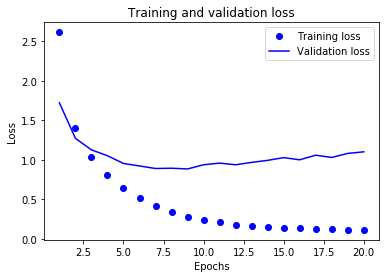

In [23]:
plot_history(history_dict, what_to_plot=[('loss', 'Training loss'),('val_loss', 'Validation loss')], 
              title='Training and validation loss', xlabel='Epochs', ylabel='Loss')

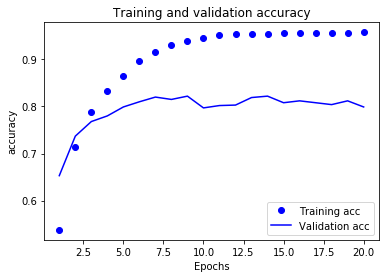

In [25]:
plot_history(history_dict, what_to_plot=[('accuracy', 'Training acc'),('val_accuracy', 'Validation acc')], 
              title='Training and validation accuracy', xlabel='Epochs', ylabel='accuracy')

In [35]:
def plot_loss_and_accuracy(history_dict, what_to_plot_loss=[('loss', 'Training loss'),('val_loss', 'Validation loss')],
                          what_to_plot_acc=[('accuracy', 'Training acc'),('val_accuracy', 'Validation acc')]):
    plot_history(history_dict, what_to_plot=what_to_plot_loss, 
              title='Training and validation loss', xlabel='Epochs', ylabel='Loss')
    plot_history(history_dict, what_to_plot=what_to_plot_acc, 
              title='Training and validation accuracy', xlabel='Epochs', ylabel='accuracy')

In [27]:
# model overfits after 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, 
                    batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels, verbose=0)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 161us/sample - loss: 2.5902 - accuracy: 0.4985 - val_loss: 1.7574 - val_accuracy: 0.6260
Epoch 2/9
7982/7982 [==============================] - 1s 71us/sample - loss: 1.4388 - accuracy: 0.6936 - val_loss: 1.3443 - val_accuracy: 0.6930
Epoch 3/9
7982/7982 [==============================] - 1s 69us/sample - loss: 1.0724 - accuracy: 0.7645 - val_loss: 1.1669 - val_accuracy: 0.7320
Epoch 4/9
7982/7982 [==============================] - 1s 75us/sample - loss: 0.8418 - accuracy: 0.8162 - val_loss: 1.0496 - val_accuracy: 0.7690
Epoch 5/9
7982/7982 [==============================] - 1s 70us/sample - loss: 0.6719 - accuracy: 0.8550 - val_loss: 0.9706 - val_accuracy: 0.7820
Epoch 6/9
7982/7982 [==============================] - 1s 73us/sample - loss: 0.5343 - accuracy: 0.8867 - val_loss: 0.9245 - val_accuracy: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 75us/sample - los

In [31]:
predictions = model.predict(x_test)
print(predictions[0].shape)

predictions[0]
print(np.argmax(predictions[0]))

(46,)
3


We mentioned earlier that another way to encode the labels would be to cast them as
an integer tensor, like this:

y_train = np.array(train_labels)
y_test = np.array(test_labels)

Then we would have to use sparse_categorical_crossentropy instead of categorical_crossentropy

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/sample - loss: 2.6985 - accuracy: 0.4689 - val_loss: 1.9302 - val_accuracy: 0.5840
Epoch 2/20
7982/7982 [==============================] - 1s 98us/sample - loss: 1.6092 - accuracy: 0.6156 - val_loss: 1.6009 - val_accuracy: 0.6030
Epoch 3/20
7982/7982 [==============================] - 1s 104us/sample - loss: 1.3064 - accuracy: 0.6562 - val_loss: 1.4103 - val_accuracy: 0.6480
Epoch 4/20
7982/7982 [==============================] - 1s 97us/sample - loss: 1.1331 - accuracy: 0.7120 - val_loss: 1.3702 - val_accuracy: 0.6790
Epoch 5/20
7982/7982 [==============================] - 1s 103us/sample - loss: 1.0147 - accuracy: 0.7397 - val_loss: 1.3483 - val_accuracy: 0.6770
Epoch 6/20
7982/7982 [==============================] - 1s 99us/sample - loss: 0.9204 - accuracy: 0.7611 - val_loss: 1.3630 - val_accuracy: 0.6810
Epoch 7/20
7982/7982 [==============================] - 1s 99us/sam

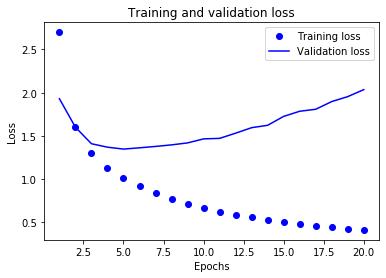

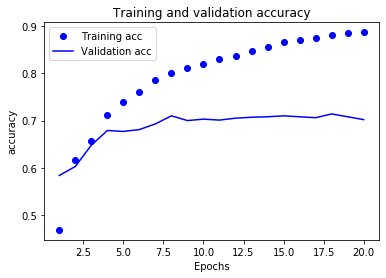

In [34]:
# create informational bottleneck :
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

history_dict = history.history

plot_loss_and_accuracy(history_dict)

In [61]:
def test_hyperparameters(parameters, partial_x_train=partial_x_train, partial_y_train=partial_y_train,
                        x_val=x_val, y_val=y_val, x_test=x_test, y_test=one_hot_test_labels):
    loss_function = parameters['loss_function']
    dense_layer_count = parameters['dense_layer_count']
    hidden_units = parameters['hidden_units']
    activation_function = parameters['activation_function']
    batch_size = parameters.get('batch_size') or 512
    lr = parameters.get('lr') or 0.001
    kernel_regularizer_param=parameters.get('kernel_regularizer') or None
    #{'l1': 0.0010000000474974513, 'l2': 0.0}
    kernel_regularizer = None
    if kernel_regularizer_param is not None:
        kernel_regularizer = regularizers.l1_l2(l1=kernel_regularizer_param['l1'] or 0.
                                               ,l2=kernel_regularizer_param['l2'] or 0.)   
    
    model = models.Sequential()
    model.add(layers.Dense(hidden_units, kernel_regularizer=kernel_regularizer,
                           activation=activation_function, input_shape=(10000,)))
    for _ in range(dense_layer_count - 1):        
        model.add(layers.Dense(hidden_units, kernel_regularizer=kernel_regularizer,
                               activation=activation_function))
        
    #model.add(layers.Dense(1, activation='sigmoid'))
    # last output layer
    model.add(layers.Dense(46, activation='softmax')) 

    model.compile(optimizer=optimizers.RMSprop(lr=lr), 
                  loss=loss_function, metrics=['accuracy'])   
    
    history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=batch_size, validation_data=(x_val, y_val))
    
    history_dict = history.history
    results = model.evaluate(x_test, one_hot_test_labels, verbose=0)

    print(results)
    plot_loss_and_accuracy(history_dict)

In [60]:
regularizer = regularizers.l1(0.001)
print(regularizers.serialize(regularizer))

{'class_name': 'L1L2', 'config': {'l1': 0.0010000000474974513, 'l2': 0.0}}


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 113us/sample - loss: 2.8718 - accuracy: 0.4451 - val_loss: 2.1565 - val_accuracy: 0.5940
Epoch 2/20
7982/7982 [==============================] - 0s 59us/sample - loss: 1.7370 - accuracy: 0.6532 - val_loss: 1.5207 - val_accuracy: 0.6670
Epoch 3/20
7982/7982 [==============================] - 0s 61us/sample - loss: 1.2815 - accuracy: 0.7274 - val_loss: 1.2536 - val_accuracy: 0.7180
Epoch 4/20
7982/7982 [==============================] - 0s 61us/sample - loss: 1.0401 - accuracy: 0.7729 - val_loss: 1.1188 - val_accuracy: 0.7560
Epoch 5/20
7982/7982 [==============================] - 0s 60us/sample - loss: 0.8766 - accuracy: 0.8155 - val_loss: 1.0396 - val_accuracy: 0.7740
Epoch 6/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.7515 - accuracy: 0.8404 - val_loss: 0.9806 - val_accuracy: 0.7940
Epoch 7/20
7982/7982 [==============================] - 1s 67us/sampl

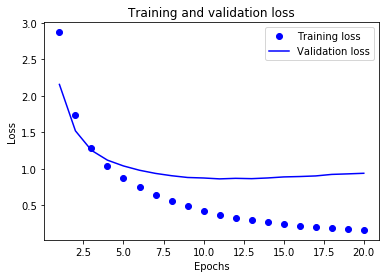

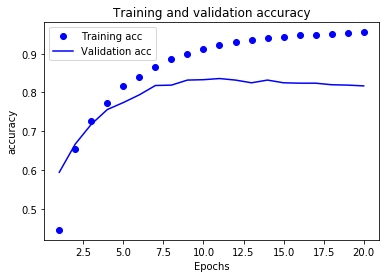

In [51]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':1, 
              'hidden_units' : 16, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 166us/sample - loss: 3.0318 - accuracy: 0.4541 - val_loss: 2.1542 - val_accuracy: 0.5850
Epoch 2/20
7982/7982 [==============================] - 0s 61us/sample - loss: 1.7019 - accuracy: 0.6309 - val_loss: 1.4799 - val_accuracy: 0.6510
Epoch 3/20
7982/7982 [==============================] - 0s 60us/sample - loss: 1.2699 - accuracy: 0.7151 - val_loss: 1.2752 - val_accuracy: 0.7210
Epoch 4/20
7982/7982 [==============================] - 0s 59us/sample - loss: 1.0611 - accuracy: 0.7719 - val_loss: 1.1644 - val_accuracy: 0.7420
Epoch 5/20
7982/7982 [==============================] - 1s 67us/sample - loss: 0.9145 - accuracy: 0.8009 - val_loss: 1.0959 - val_accuracy: 0.7550
Epoch 6/20
7982/7982 [==============================] - 0s 58us/sample - loss: 0.7986 - accuracy: 0.8182 - val_loss: 1.0626 - val_accuracy: 0.7630
Epoch 7/20
7982/7982 [==============================] - 0s 61us/sampl

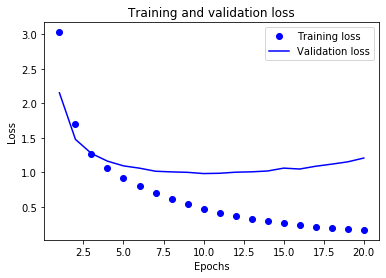

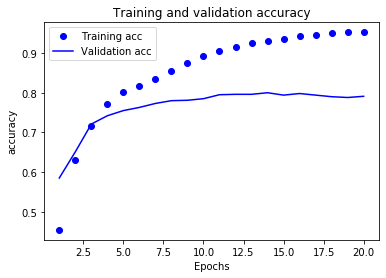

In [52]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 16, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 140us/sample - loss: 2.2333 - accuracy: 0.5698 - val_loss: 1.4442 - val_accuracy: 0.6760
Epoch 2/20
7982/7982 [==============================] - 1s 79us/sample - loss: 1.1965 - accuracy: 0.7358 - val_loss: 1.1702 - val_accuracy: 0.7400
Epoch 3/20
7982/7982 [==============================] - 1s 75us/sample - loss: 0.8904 - accuracy: 0.8023 - val_loss: 1.0290 - val_accuracy: 0.7790
Epoch 4/20
7982/7982 [==============================] - 1s 76us/sample - loss: 0.6783 - accuracy: 0.8523 - val_loss: 0.9566 - val_accuracy: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 76us/sample - loss: 0.5254 - accuracy: 0.8832 - val_loss: 0.9325 - val_accuracy: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 75us/sample - loss: 0.4093 - accuracy: 0.9092 - val_loss: 0.9140 - val_accuracy: 0.8190
Epoch 7/20
7982/7982 [==============================] - 1s 81us/sampl

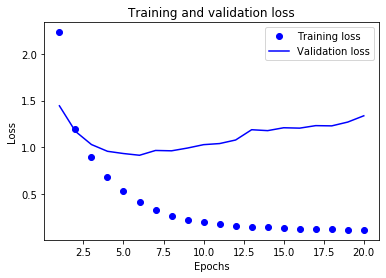

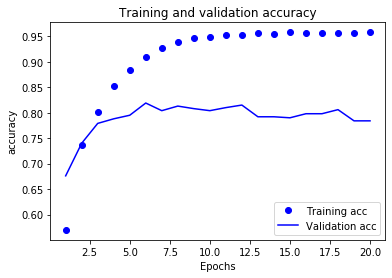

In [53]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 32, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 170us/sample - loss: 1.8723 - accuracy: 0.6164 - val_loss: 1.2363 - val_accuracy: 0.7170
Epoch 2/20
7982/7982 [==============================] - 1s 104us/sample - loss: 0.9642 - accuracy: 0.7861 - val_loss: 0.9947 - val_accuracy: 0.8030
Epoch 3/20
7982/7982 [==============================] - 1s 100us/sample - loss: 0.6459 - accuracy: 0.8619 - val_loss: 0.8878 - val_accuracy: 0.8120
Epoch 4/20
7982/7982 [==============================] - 1s 99us/sample - loss: 0.4442 - accuracy: 0.9078 - val_loss: 0.8444 - val_accuracy: 0.8280
Epoch 5/20
7982/7982 [==============================] - 1s 104us/sample - loss: 0.3176 - accuracy: 0.9330 - val_loss: 0.8424 - val_accuracy: 0.8230
Epoch 6/20
7982/7982 [==============================] - 1s 100us/sample - loss: 0.2483 - accuracy: 0.9409 - val_loss: 0.8645 - val_accuracy: 0.8260
Epoch 7/20
7982/7982 [==============================] - 1s 107us/

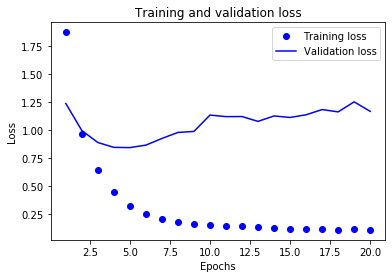

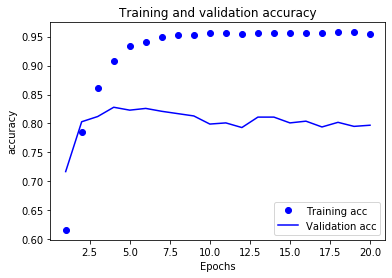

In [54]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 64, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/sample - loss: 1.8116 - accuracy: 0.6021 - val_loss: 1.2982 - val_accuracy: 0.7220
Epoch 2/20
7982/7982 [==============================] - 1s 103us/sample - loss: 1.0169 - accuracy: 0.7732 - val_loss: 1.0539 - val_accuracy: 0.7830
Epoch 3/20
7982/7982 [==============================] - 1s 108us/sample - loss: 0.7027 - accuracy: 0.8378 - val_loss: 0.9685 - val_accuracy: 0.7910
Epoch 4/20
7982/7982 [==============================] - 1s 100us/sample - loss: 0.4876 - accuracy: 0.8903 - val_loss: 0.9706 - val_accuracy: 0.8020
Epoch 5/20
7982/7982 [==============================] - 1s 102us/sample - loss: 0.3477 - accuracy: 0.9226 - val_loss: 1.0314 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 102us/sample - loss: 0.2666 - accuracy: 0.9432 - val_loss: 1.0694 - val_accuracy: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 106us

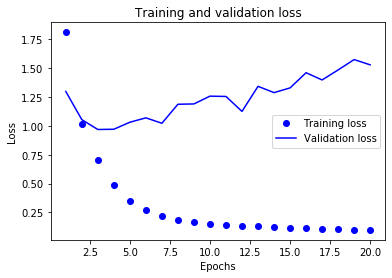

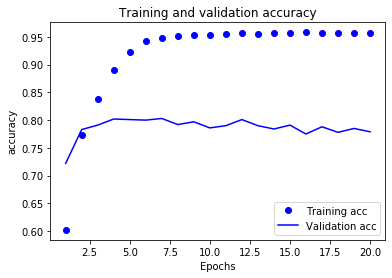

In [55]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':3, 
              'hidden_units' : 64, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 214us/sample - loss: 1.5407 - accuracy: 0.6602 - val_loss: 1.0764 - val_accuracy: 0.7630
Epoch 2/20
7982/7982 [==============================] - 1s 149us/sample - loss: 0.7365 - accuracy: 0.8385 - val_loss: 0.9099 - val_accuracy: 0.8020
Epoch 3/20
7982/7982 [==============================] - 1s 150us/sample - loss: 0.4394 - accuracy: 0.9063 - val_loss: 0.8544 - val_accuracy: 0.8210
Epoch 4/20
7982/7982 [==============================] - 1s 150us/sample - loss: 0.2960 - accuracy: 0.9359 - val_loss: 0.8583 - val_accuracy: 0.8230
Epoch 5/20
7982/7982 [==============================] - 1s 150us/sample - loss: 0.2210 - accuracy: 0.9449 - val_loss: 0.8930 - val_accuracy: 0.8220
Epoch 6/20
7982/7982 [==============================] - 1s 151us/sample - loss: 0.1896 - accuracy: 0.9504 - val_loss: 0.9269 - val_accuracy: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 146us

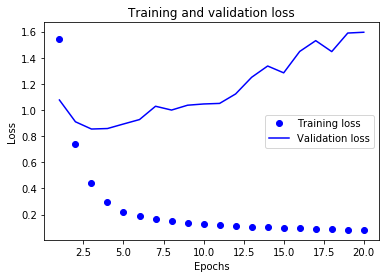

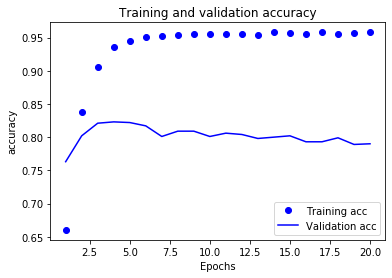

In [62]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 128, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 194us/sample - loss: 3.5719 - accuracy: 0.5872 - val_loss: 2.4254 - val_accuracy: 0.6680
Epoch 2/20
7982/7982 [==============================] - 1s 115us/sample - loss: 2.3274 - accuracy: 0.6878 - val_loss: 2.2140 - val_accuracy: 0.6890
Epoch 3/20
7982/7982 [==============================] - 1s 119us/sample - loss: 2.1557 - accuracy: 0.7095 - val_loss: 2.1158 - val_accuracy: 0.7070
Epoch 4/20
7982/7982 [==============================] - 1s 118us/sample - loss: 2.0521 - accuracy: 0.7228 - val_loss: 2.0842 - val_accuracy: 0.7030
Epoch 5/20
7982/7982 [==============================] - 1s 117us/sample - loss: 1.9886 - accuracy: 0.7284 - val_loss: 1.9882 - val_accuracy: 0.7210
Epoch 6/20
7982/7982 [==============================] - 1s 118us/sample - loss: 1.9311 - accuracy: 0.7430 - val_loss: 1.9458 - val_accuracy: 0.7210
Epoch 7/20
7982/7982 [==============================] - 1s 117us

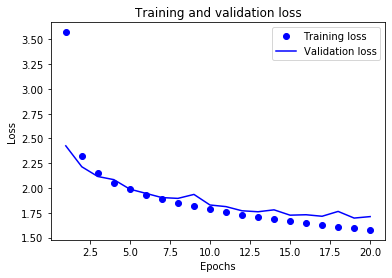

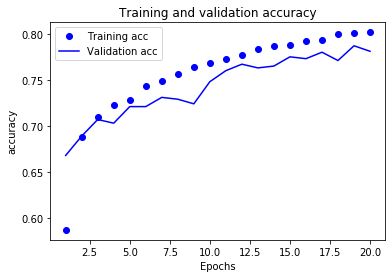

In [65]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 64, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001
             , 'kernel_regularizer': {'l1': 0.001, 'l2': 0.}}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 195us/sample - loss: 1.9211 - accuracy: 0.6238 - val_loss: 1.3754 - val_accuracy: 0.7040
Epoch 2/20
7982/7982 [==============================] - 1s 114us/sample - loss: 1.1308 - accuracy: 0.7814 - val_loss: 1.1731 - val_accuracy: 0.7700
Epoch 3/20
7982/7982 [==============================] - 1s 119us/sample - loss: 0.8971 - accuracy: 0.8433 - val_loss: 1.1049 - val_accuracy: 0.7900
Epoch 4/20
7982/7982 [==============================] - 1s 120us/sample - loss: 0.7584 - accuracy: 0.8770 - val_loss: 1.0572 - val_accuracy: 0.8130
Epoch 5/20
7982/7982 [==============================] - 1s 113us/sample - loss: 0.6695 - accuracy: 0.8980 - val_loss: 1.0361 - val_accuracy: 0.8220
Epoch 6/20
7982/7982 [==============================] - 1s 116us/sample - loss: 0.6112 - accuracy: 0.9109 - val_loss: 1.0587 - val_accuracy: 0.8210
Epoch 7/20
7982/7982 [==============================] - 1s 113us

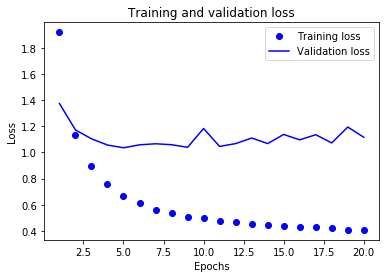

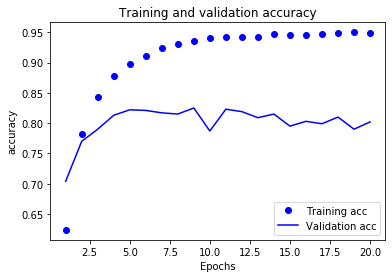

In [66]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 64, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001
             , 'kernel_regularizer': {'l1': 0., 'l2': 0.001}}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 300us/sample - loss: 4.9214 - accuracy: 0.5881 - val_loss: 3.4419 - val_accuracy: 0.5330
Epoch 2/20
7982/7982 [==============================] - 1s 185us/sample - loss: 2.9539 - accuracy: 0.6828 - val_loss: 2.8200 - val_accuracy: 0.6760
Epoch 3/20
7982/7982 [==============================] - 1s 180us/sample - loss: 2.6612 - accuracy: 0.6966 - val_loss: 2.5405 - val_accuracy: 0.7000
Epoch 4/20
7982/7982 [==============================] - 1s 184us/sample - loss: 2.5065 - accuracy: 0.7046 - val_loss: 2.5090 - val_accuracy: 0.7020
Epoch 5/20
7982/7982 [==============================] - 1s 181us/sample - loss: 2.4011 - accuracy: 0.7136 - val_loss: 2.3828 - val_accuracy: 0.7050
Epoch 6/20
7982/7982 [==============================] - 1s 182us/sample - loss: 2.3229 - accuracy: 0.7156 - val_loss: 2.2697 - val_accuracy: 0.7140
Epoch 7/20
7982/7982 [==============================] - 1s 181us

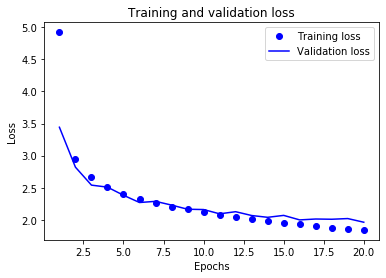

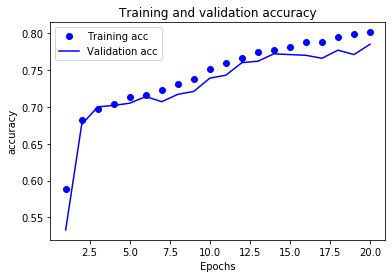

In [67]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 128, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001
             , 'kernel_regularizer': {'l1': 0.001, 'l2': 0.}}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 467us/sample - loss: 54.4906 - accuracy: 0.3953 - val_loss: 20.2544 - val_accuracy: 0.3860
Epoch 2/20
7982/7982 [==============================] - 3s 351us/sample - loss: 16.5596 - accuracy: 0.4782 - val_loss: 15.3563 - val_accuracy: 0.5160
Epoch 3/20
7982/7982 [==============================] - 3s 348us/sample - loss: 15.4711 - accuracy: 0.5070 - val_loss: 15.5460 - val_accuracy: 0.5250
Epoch 4/20
7982/7982 [==============================] - 3s 358us/sample - loss: 15.3685 - accuracy: 0.5169 - val_loss: 15.1741 - val_accuracy: 0.5200
Epoch 5/20
7982/7982 [==============================] - 3s 345us/sample - loss: 15.2829 - accuracy: 0.5239 - val_loss: 15.3611 - val_accuracy: 0.5340
Epoch 6/20
7982/7982 [==============================] - 3s 352us/sample - loss: 15.2184 - accuracy: 0.5264 - val_loss: 15.0610 - val_accuracy: 0.5350
Epoch 7/20
7982/7982 [==============================

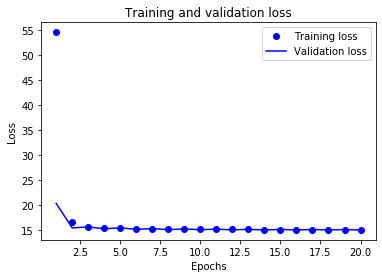

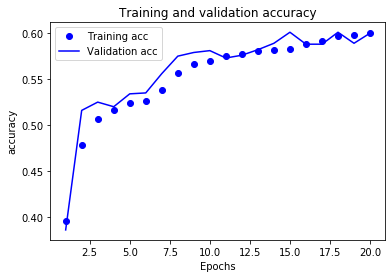

In [68]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 256, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001
             , 'kernel_regularizer': {'l1': 0.01, 'l2': 0.01}}
test_hyperparameters(parameters)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 391us/sample - loss: 1.8172 - accuracy: 0.6815 - val_loss: 1.3675 - val_accuracy: 0.7640
Epoch 2/20
7982/7982 [==============================] - 2s 302us/sample - loss: 1.0678 - accuracy: 0.8324 - val_loss: 1.2403 - val_accuracy: 0.7970
Epoch 3/20
7982/7982 [==============================] - 2s 301us/sample - loss: 0.8434 - accuracy: 0.8860 - val_loss: 1.1475 - val_accuracy: 0.8130
Epoch 4/20
7982/7982 [==============================] - 2s 296us/sample - loss: 0.7181 - accuracy: 0.9131 - val_loss: 1.0966 - val_accuracy: 0.8220
Epoch 5/20
7982/7982 [==============================] - 2s 301us/sample - loss: 0.6670 - accuracy: 0.9214 - val_loss: 1.1399 - val_accuracy: 0.8210
Epoch 6/20
7982/7982 [==============================] - 2s 294us/sample - loss: 0.6132 - accuracy: 0.9261 - val_loss: 1.1741 - val_accuracy: 0.7950
Epoch 7/20
7982/7982 [==============================] - 2s 298us

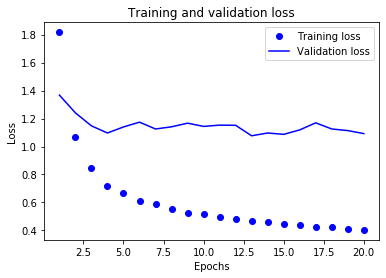

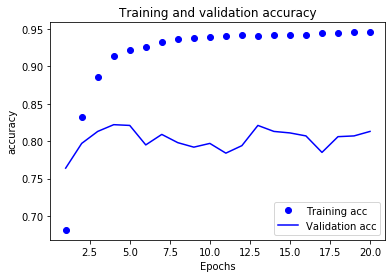

In [69]:
parameters = {'loss_function' : 'categorical_crossentropy', 'dense_layer_count':2, 
              'hidden_units' : 256, 'activation_function': 'relu', 'batch_size': 128, 'lr': 0.001
             , 'kernel_regularizer': {'l1': 0., 'l2': 0.001}}
test_hyperparameters(parameters)